In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [36]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [37]:
df = df.drop('CustomerID', axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [38]:
corr=df.corr()
corr

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


<Axes: >

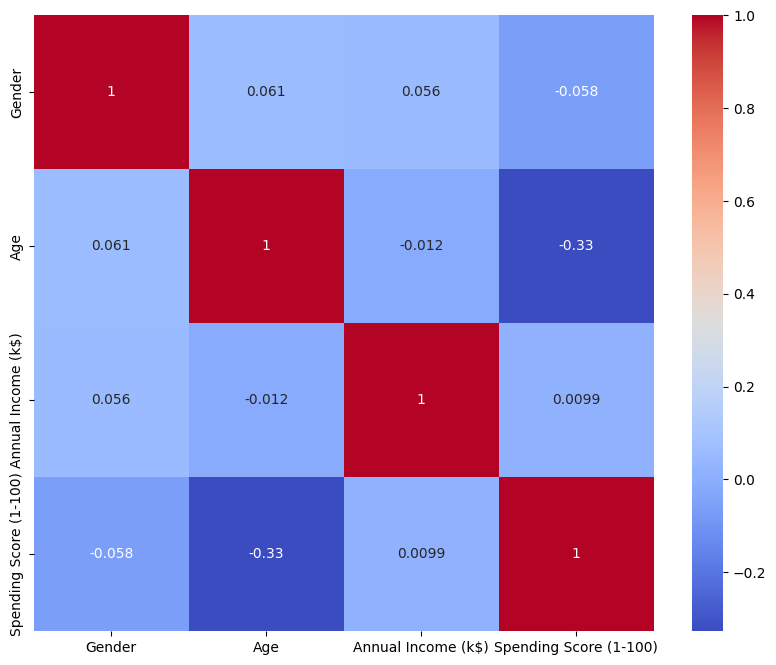

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Age and Spending Score (1-100): There's a moderate negative correlation of approximately -0.33. This suggests that as customers get older, their spending score tends to slightly decrease, though it's not a very strong relationship.

Annual Income (k$) and Spending Score (1-100): Surprisingly, there is a very weak positive correlation of around 0.01. This indicates that, linearly, annual income does not have a significant impact on the spending score in this dataset.

Gender and other variables: 'Gender' shows very weak linear correlations with 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' (all values close to 0.06 or -0.06). This implies that, based on this dataset, gender does not have a strong linear relationship with age, income, or spending habits.

Overall: Most variables have very weak linear relationships with each other, meaning that a simple linear model might not capture complex interactions or non-linear patterns that could exist.

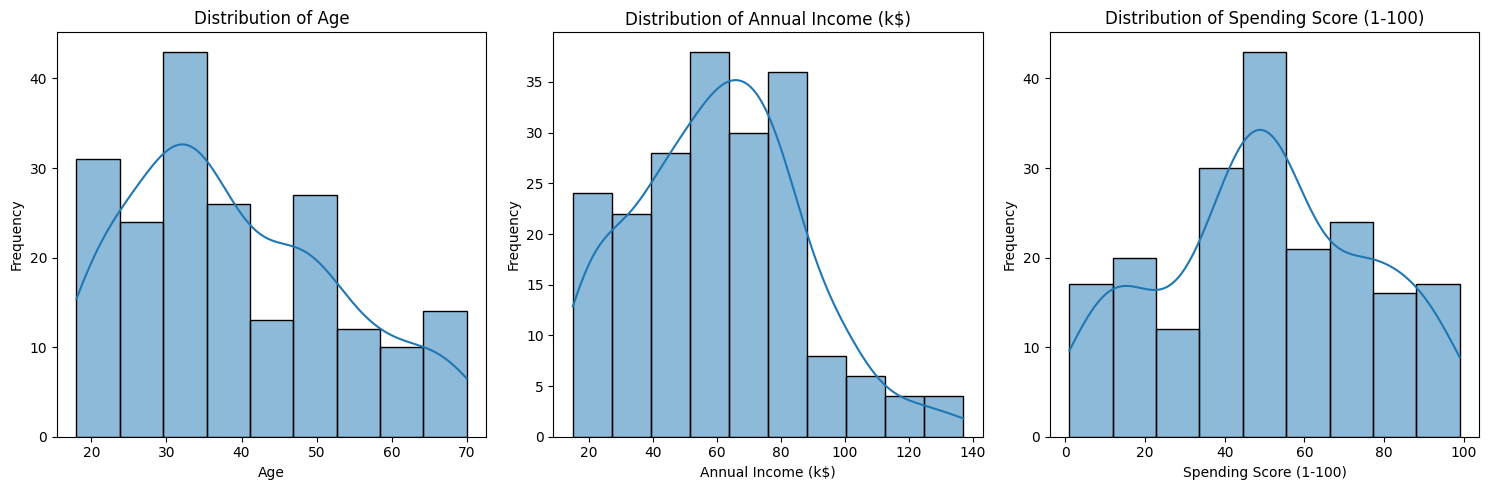

In [40]:
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Age Distribution: This histogram shows that the majority of customers are concentrated in the age range of 20 to 50 years, with a noticeable peak in their late 20s to early 30s. There are fewer very young or very old customers.

Annual Income (k$) Distribution: The annual income appears to be roughly normally distributed, with a prominent peak around the 60k-80k range. This suggests that a significant portion of the mall customers have a moderate annual income.

Spending Score (1-100) Distribution: This distribution is quite spread out and appears somewhat uniform across the range of 1 to 100, though there might be slight peaks indicating common spending score ranges. This suggests a diverse customer base in terms of spending habits, rather than being heavily skewed towards very low or very high spenders.

# Feature Engineering

Done binning for age as age group and  income as income group

In [42]:
df=pd.read_csv('/content/Mall_Customers.csv')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

df = df.drop('CustomerID', axis=1)

age_bins = [15, 30, 50, 100]
age_labels = ['Young', 'Middle-aged', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

income_bins = [0, 30, 70, 100, 150]
income_labels = ['Low', 'Medium', 'High', 'Very High']
df['Income_Group'] = pd.cut(df['Annual Income (k$)'], bins=income_bins, labels=income_labels, right=False)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Annual Income (k$)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)']])

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Income_Group
0,1,-1.424569,-1.738999,39,Young,Low
1,1,-1.281035,-1.738999,81,Young,Low
2,0,-1.352802,-1.700830,6,Young,Low
3,0,-1.137502,-1.700830,77,Young,Low
4,0,-0.563369,-1.662660,40,Middle-aged,Low


In [47]:
le = LabelEncoder()
df['Age_Group'] = le.fit_transform(df['Age_Group'])
df['Income_Group'] = le.fit_transform(df['Income_Group'])

df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Income_Group
0,1,-1.424569,-1.738999,39,2,1
1,1,-1.281035,-1.738999,81,2,1
2,0,-1.352802,-1.700830,6,2,1
3,0,-1.137502,-1.700830,77,2,1
4,0,-0.563369,-1.662660,40,0,1


<Axes: >

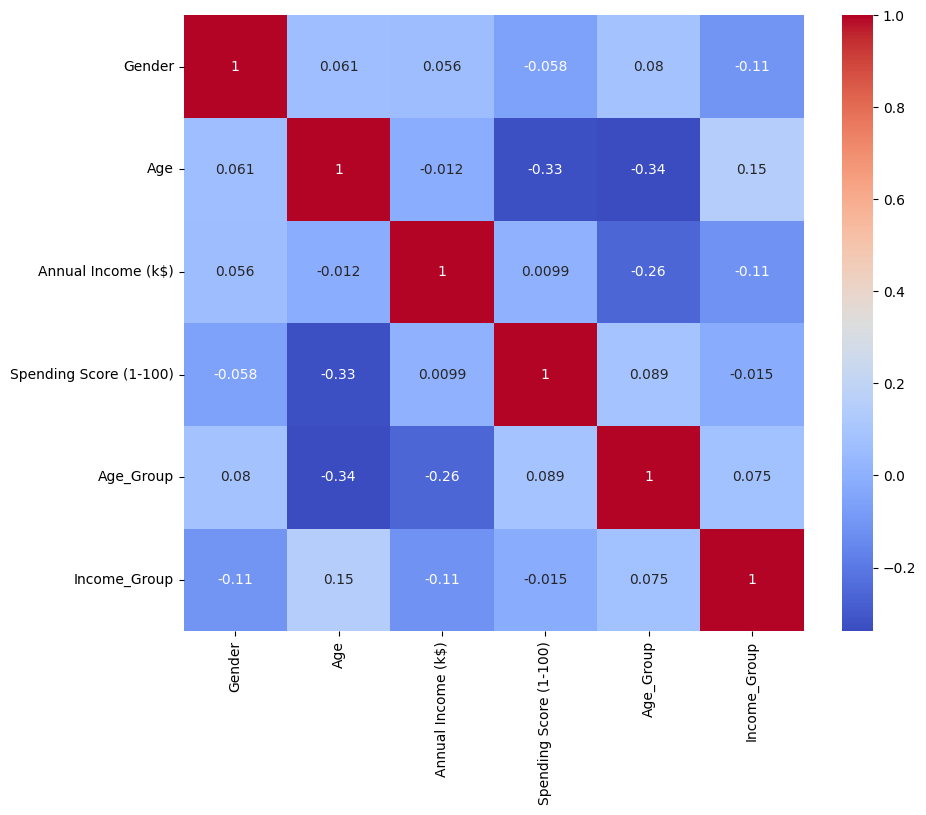

In [48]:
corr=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Even feature engineering doesnt give good correlated features with spending score. We dont have rich features that are enough for training a regression model

In [49]:
X = df.drop('Spending Score (1-100)', axis=1)
y = df['Spending Score (1-100)']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Features (X) after dropping CustomerID and target variable:")
print(X.head())
print("\nTarget (y):")
print(y.head())
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Features (X) after dropping CustomerID and target variable:
   Gender       Age  Annual Income (k$)  Age_Group  Income_Group
0       1 -1.424569           -1.738999          2             1
1       1 -1.281035           -1.738999          2             1
2       0 -1.352802           -1.700830          2             1
3       0 -1.137502           -1.700830          2             1
4       0 -0.563369           -1.662660          0             1

Target (y):
0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

X_train shape: (160, 5)
X_test shape: (40, 5)
y_train shape: (160,)
y_test shape: (40,)


## Train and Evaluate Linear Regression Model



In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 2. Instantiate a LinearRegression model object.
lr_model = LinearRegression()

# 3. Train the model using the fit method with X_train and y_train.
lr_model.fit(X_train, y_train)

# 4. Make predictions on X_test using the trained model's predict method.
y_pred_lr = lr_model.predict(X_test)

# 6. Calculate the R-squared score.
r2 = r2_score(y_test, y_pred_lr)

# 7. Calculate the Mean Squared Error (MSE).
mse = mean_squared_error(y_test, y_pred_lr)

# 8. Print the calculated R-squared score and MSE.
print(f"Linear Regression - R-squared: {r2:.2f}")
print(f"Linear Regression - Mean Squared Error (MSE): {mse:.2f}")

Linear Regression - R-squared: 0.01
Linear Regression - Mean Squared Error (MSE): 490.41


## Train and Evaluate XGBoost Regressor Model



In [53]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 2. Instantiate an XGBRegressor model object.
xgb_model = XGBRegressor(random_state=42)

# 3. Train the model using the fit method with X_train and y_train.
xgb_model.fit(X_train, y_train)

# 4. Make predictions on X_test using the trained model's predict method.
y_pred_xgb = xgb_model.predict(X_test)

# 5. Calculate the R-squared score.
r2_xgb = r2_score(y_test, y_pred_xgb)

# 6. Calculate the Mean Squared Error (MSE).
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# 7. Print the calculated R-squared score and MSE.
print(f"XGBoost Regressor - R-squared: {r2_xgb:.2f}")
print(f"XGBoost Regressor - Mean Squared Error (MSE): {mse_xgb:.2f}")

XGBoost Regressor - R-squared: -0.29
XGBoost Regressor - Mean Squared Error (MSE): 634.62



## Train and Evaluate Random Forest Regressor Model

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 2. Instantiate a RandomForestRegressor model object.
rf_model = RandomForestRegressor(random_state=42)

# 3. Train the model using the fit method with X_train and y_train.
rf_model.fit(X_train, y_train)

# 4. Make predictions on X_test using the trained model's predict method.
y_pred_rf = rf_model.predict(X_test)

# 5. Calculate the R-squared score.
r2_rf = r2_score(y_test, y_pred_rf)

# 6. Calculate the Mean Squared Error (MSE).
mse_rf = mean_squared_error(y_test, y_pred_rf)

# 7. Print the calculated R-squared score and MSE.
print(f"Random Forest Regressor - R-squared: {r2_rf:.2f}")
print(f"Random Forest Regressor - Mean Squared Error (MSE): {mse_rf:.2f}")

Random Forest Regressor - R-squared: 0.09
Random Forest Regressor - Mean Squared Error (MSE): 447.79


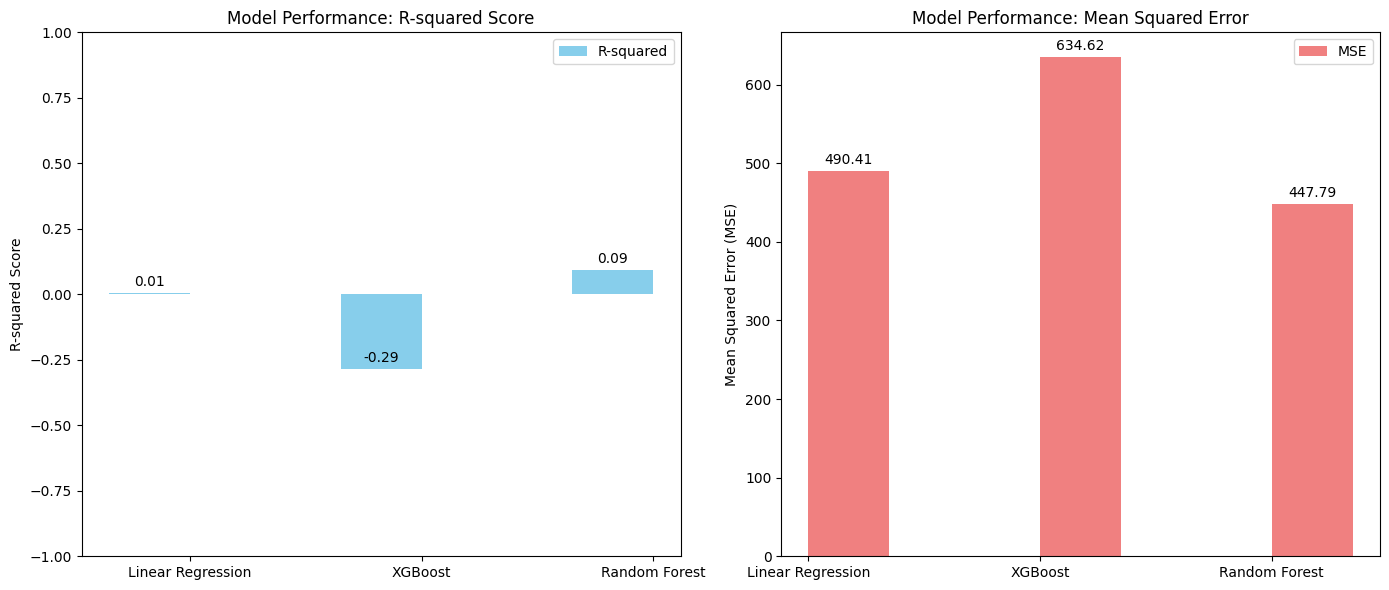

In [55]:
model_names = ['Linear Regression', 'XGBoost', 'Random Forest']
r2_scores = [r2, r2_xgb, r2_rf]
mse_scores = [mse, mse_xgb, mse_rf]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# R-squared plot
rects1 = ax[0].bar(x - width/2, r2_scores, width, label='R-squared', color='skyblue')
ax[0].set_ylabel('R-squared Score')
ax[0].set_title('Model Performance: R-squared Score')
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_names)
ax[0].legend()
ax[0].set_ylim(-1.0, 1.0)

for rect in rects1:
    height = rect.get_height()
    ax[0].annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# MSE plot
rects2 = ax[1].bar(x + width/2, mse_scores, width, label='MSE', color='lightcoral')
ax[1].set_ylabel('Mean Squared Error (MSE)')
ax[1].set_title('Model Performance: Mean Squared Error')
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_names)
ax[1].legend()

for rect in rects2:
    height = rect.get_height()
    ax[1].annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

Linear Regression - R-squared: 0.01

Linear Regression - Mean Squared Error (MSE): 490.41

-------------------------------------------------------
Random Forest Regressor - R-squared: 0.09

Random Forest Regressor - Mean Squared Error (MSE): 447.79

-----------------------------------------------------------
XGBoost Regressor - R-squared: -0.29

XGBoost Regressor - Mean Squared Error (MSE): 634.62

------------------------------------------------------

## Model Performance Analysis
### This results states that none of the model performed well and has a very low R-squared value. This is because none of the features had correlation with target variable spending score

## Improvements

Collect more data and which has rich features and that correlate with the spending score

## Customer attribute that influenced spending

Only Age has a negative correlation with the spending score, which states that young people tends to spend more compared to older people

## Attribute influencing annual spending
Weak Correlations: The initial correlation analysis (heatmap) revealed very weak linear relationships between 'Spending Score' and 'Age', 'Annual Income, and 'Gender'. Even after binning 'Age' and 'Annual Income' into groups, the linear correlations remained low.

Poor Model Performance strongly suggests that our current features are insufficient to predict or explain the 'Spending Score' effectively.
Insights for Improving Targeted Marketing (Given Current Data Limitations):
Since the current features don't strongly predict spending scores, the primary insight for targeted marketing is that we need richer, more predictive data.

Acquire More Relevant Features: The most impactful step would be to expand the dataset with features that are more directly linked to spending behavior.

The current dataset suggests that 'Spending Score' is driven by factors not present in 'Gender', 'Age', or 'Annual Income'. To build truly effective targeted marketing strategies, the next phase should focus heavily on data enrichment and exploratory segmentation.




### Since with this dataset (limited features) we cant predict the spending score of each customer.

### But we can perform Customer Segmentation to classify the customers into different categories to understand the customer behaviours

## Segmentation using K Means clustering

In [56]:
X_kmeans = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
print("Selected features for K-Means clustering (X_kmeans):")
print(X_kmeans.head())

Selected features for K-Means clustering (X_kmeans):
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999                      39
1 -1.281035           -1.738999                      81
2 -1.352802           -1.700830                       6
3 -1.137502           -1.700830                      77
4 -0.563369           -1.662660                      40


## Determine Optimal Number of Clusters (Elbow Method)



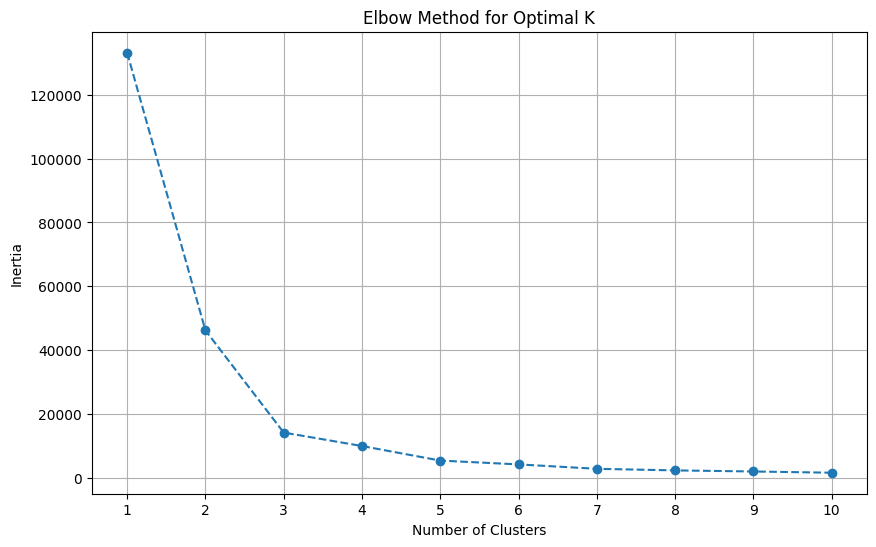

Elbow Method plot generated successfully.


In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []

# Loop through a range of possible cluster numbers
for k in range(1, 11): # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X_kmeans)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
print("Elbow Method plot generated successfully.")

Based on the elbow method plot generated, we look for the 'elbow point' where the rate of decrease in inertia significantly slows down. In this plot, a prominent elbow appears to be around **k=5**. After k=5, the decrease in inertia becomes less substantial, suggesting that adding more clusters beyond this point provides diminishing returns in terms of reducing within-cluster sum of squares. Therefore, **5** is chosen as the optimal number of clusters for this dataset.

## Apply K-Means Clustering




In [58]:
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init='auto')
df['Cluster'] = kmeans_model.fit_predict(X_kmeans)

print("DataFrame with K-Means cluster labels:")
df.head()

DataFrame with K-Means cluster labels:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Income_Group,Cluster
0,1,-1.424569,-1.738999,39,2,1,4
1,1,-1.281035,-1.738999,81,2,1,3
2,0,-1.352802,-1.700830,6,2,1,2
3,0,-1.137502,-1.700830,77,2,1,3
4,0,-0.563369,-1.662660,40,0,1,4


## Visualize Clusters



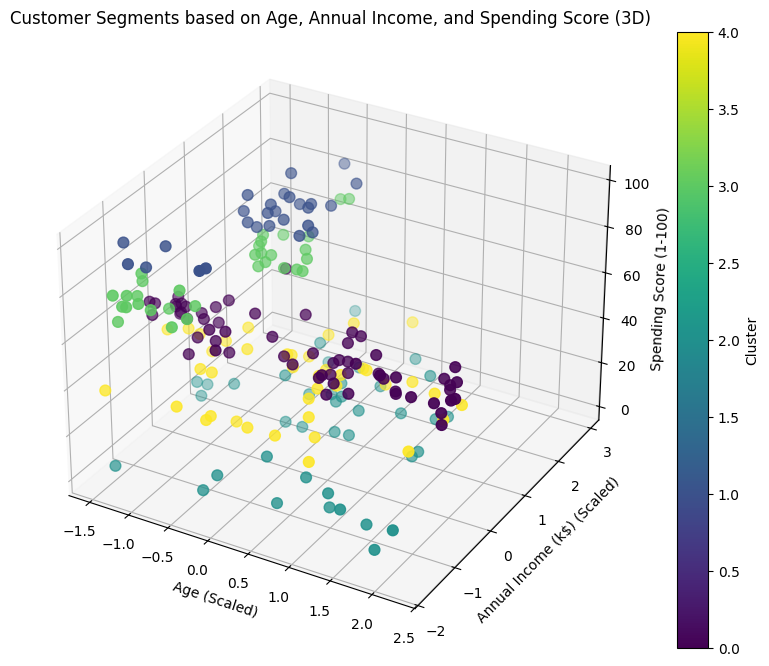

3D scatter plot of customer segments generated successfully.


In [59]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
                     c=df['Cluster'], cmap='viridis', s=60)

ax.set_xlabel('Age (Scaled)')
ax.set_ylabel('Annual Income (k$) (Scaled)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segments based on Age, Annual Income, and Spending Score (3D)')

plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()
print("3D scatter plot of customer segments generated successfully.")

## Interpret Cluster Characteristics


## Summary:

### Data Analysis Key Findings

*   **Feature Selection for Clustering**: The K-Means clustering was performed using three key customer attributes: 'Age', 'Annual Income (k\$)', and 'Spending Score (1-100)'.
*   **Optimal Number of Clusters**: The Elbow Method, which plots inertia against the number of clusters, indicated that 5 is the optimal number of clusters for this dataset, as the decrease in inertia significantly slowed down after \$k=5\$.
*   **Customer Segmentation**: The K-Means algorithm successfully segmented the customers into 5 distinct groups based on their 'Age', 'Annual Income (k\$)', and 'Spending Score (1-100)'.
*   **Visual Representation**: The identified customer segments were visualized using a 3D scatter plot, clearly differentiating the 5 clusters based on the chosen features.




In [60]:
cluster_characteristics = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Average characteristics for each cluster:")
print(cluster_characteristics)

Average characteristics for each cluster:
              Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                      
0        0.308250           -0.248545               52.790323
1       -0.536788            0.510170               90.703704
2        0.318074            0.293768               11.846154
3       -0.731572           -0.128726               74.250000
4        0.159681           -0.142563               37.000000


### Interpretation of Clusters (Based on Averages):

Based on the average values for 'Age', 'Annual Income', and 'Spending Score (1-100)', we can interpret the 5 customer segments:

*   **Cluster 0: Moderate Income, Low-Spending Younger Adults**
    

*   **Cluster 1: High-Spending, High-Income Middle-Aged**
   

*   **Cluster 2: Low-Spending, Low-Income Mixed Ages**
  

*   **Cluster 3: Moderate-Spending, Moderate-Income Young Adults**
   

*   **Cluster 4: High-Spending, Low-Income Young Adults**
    

## Based on clusters we can see the customer spending behaviour:

### Cluster 0: Moderate Income, Low-Spending Younger Adults

These customers tend to be younger adults with moderate incomes and relatively low spending scores. They might be cautious spenders or have other financial priorities, and could be targeted with value-driven offers.

### Cluster 1: High-Spending, High-Income Middle-Aged

This segment consists of middle-aged individuals with high annual incomes and very high spending scores. They are likely your most valuable customers and are prime candidates for premium products, exclusive services, and loyalty programs.

### Cluster 2: Low-Spending, Low-Income Mixed Ages

This group spans mixed ages, has low annual incomes, and very low spending scores. They are likely price-sensitive, and marketing efforts should focus on essential goods, discounts, and promotions.

### Cluster 3: Moderate-Spending, Moderate-Income Young Adults

These are young adults with moderate incomes and moderate to high spending scores. They represent a growth opportunity and could be engaged with trendy products, experiences, or personalized recommendations to increase their spending.

### Cluster 4: High-Spending, Low-Income Young Adults

This segment is characterized by young individuals with lower incomes but surprisingly high spending scores. They might be impulse buyers or prioritize experiences over saving. Marketing to this group could focus on appealing products, fashion, or entertainment, rather than just price.